# **Bank Marketing Campaign Analysis — Phase 1: Data Understanding & Setup**

**Objective:**  
This notebook initiates the *Marketing Campaign Optimization* project using the real-world **Bank Marketing Dataset**.  
The goal of this phase is to perform data loading, exploration, and preparation steps that form the foundation for later **statistical testing**, **predictive modeling**, and **business intelligence visualization**.

**Key Tasks in this Phase:**
1. Load and inspect the dataset (`bank-full.csv`)
2. Understand the structure, data types, and feature distributions
3. Handle missing or "unknown" values appropriately
4. Encode the target variable (`y`) for modeling
5. Generate summary statistics and visual overviews for initial insights

**Dataset Source:**  
UCI Machine Learning Repository — [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

**File Used:**  
`bank-full.csv`

**Next Phase:**  
→ Statistical Hypothesis Testing (A/B testing, t-test, chi-square, ANOVA)


In [9]:
# Core
import pandas as pd
import numpy as np
import os
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

# profiling for EDA
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')

## **1. Load and inspect the dataset (bank-full.csv)**

In [5]:
df = pd.read_csv("bank-full.csv")
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
5  unknown    5   may       139         1     -1         0  unknown  no  
6  unknown    5   may       217         1     -1         0  unknown  no  
7  unknown    5   may       380         1     -1         0  unknown  no  
8  unknown    5   may        50         1     -1         0  unknown  no  
9  unknown    5   may        55         1     -1         0  unknown  no

In [6]:
# checking for duplication
df.duplicated().sum()

np.int64(0)

In [7]:
# checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So by quickly looking we can tell taht the datset doesnt have duplicate values or null values

In [11]:
# Profiling to get quich automatic EDA analysis
profile = ProfileReport(df, title="Bank markerting EDA Report", explorative=True)
profile.to_file("bank_marketing_eda_report.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:01<00:00, 13.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Changing y value to unicoded values
df['y'].unique()
df['y'] = df['y'].map({"no": 0, "yes":1})
df['y'].unique()

array([0, 1])

In [15]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

<Axes: >

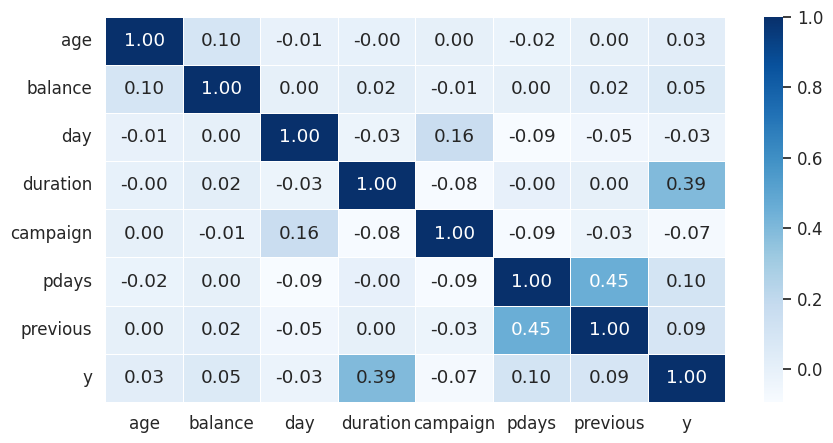

In [21]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)

### Data Quality Notes
- High correlation: pdays ↔ poutcome ↔ previous  
- High skewness: previous, balance  
- Imbalance: default, poutcome  
These will be treated or controlled in later statistical and modeling phases.


## Correlation & Alerts (via Profiling)

| Alert                                                      | Business Interpretation                                                                                                          | Next Steps                                                                                             |
| ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **High correlation between `contact`, `month`, `housing`** | Campaign month and contact type may be strategy-linked — e.g., “cellular” used in later months when housing loans were promoted. | Check confounding effect before testing; may omit one variable to avoid multicollinearity in modeling. |
| **`pdays`, `poutcome`, `previous` highly correlated**      | These describe *past campaign interactions* — naturally related.                                                                 | Keep one or two for modeling; test their predictive importance later.                                  |
| **`default` highly imbalanced (87%)**                      | Very few clients have defaulted; probably not informative.                                                                       | Consider dropping or treating as categorical noise in analysis.                                        |
| **`previous` highly skewed (γ = 41)**                      | Most clients were never previously contacted; few have many prior contacts.                                                      | Log-transform or bin this variable before modeling.                                                    |
| **`balance` has 7.8% zeros**                               | Some clients have inactive or empty accounts.                                                                                    | May test its relation to subscription in t-test later.                                                 |


In [23]:
df.to_csv("bank_marketing_new.csv")